### Stock Price prediction model

In [6]:
import pandas as pd
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf


#### Load the dataset

In [4]:
# load CSV file
df = pd.read_csv('Raw Dataset/GRAE Historical Data.csv')

#### Data Prepossessing

In [5]:
# type of data
print(df.dtypes)

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      960 non-null    object 
 1   Price     960 non-null    float64
 2   Open      960 non-null    float64
 3   High      960 non-null    float64
 4   Low       960 non-null    float64
 5   Vol.      959 non-null    object 
 6   Change %  960 non-null    object 
dtypes: float64(4), object(3)
memory usage: 52.6+ KB


In [7]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2023,286.6,286.6,286.6,286.6,3.14K,0.00%
1,02/16/2023,286.6,286.6,286.6,286.6,5.43K,0.00%
2,02/15/2023,286.6,286.6,286.6,286.6,2.27K,0.00%
3,02/14/2023,286.6,286.6,286.6,286.6,2.73K,0.00%
4,02/13/2023,286.6,286.6,286.6,286.6,2.94K,0.00%


In [8]:
# Remove % sign from the data
df['Change %'] = df['Change %'].str.replace('%', '')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2023,286.6,286.6,286.6,286.6,3.14K,0.00
1,02/16/2023,286.6,286.6,286.6,286.6,5.43K,0.00
2,02/15/2023,286.6,286.6,286.6,286.6,2.27K,0.00
3,02/14/2023,286.6,286.6,286.6,286.6,2.73K,0.00
4,02/13/2023,286.6,286.6,286.6,286.6,2.94K,0.00


In [9]:
# Remove K sign from the data
df['Vol.'] = df['Vol.'].str.replace('K', '')

In [10]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2023,286.6,286.6,286.6,286.6,3.14,0.00
1,02/16/2023,286.6,286.6,286.6,286.6,5.43,0.00
2,02/15/2023,286.6,286.6,286.6,286.6,2.27,0.00
3,02/14/2023,286.6,286.6,286.6,286.6,2.73,0.00
4,02/13/2023,286.6,286.6,286.6,286.6,2.94,0.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      960 non-null    object 
 1   Price     960 non-null    float64
 2   Open      960 non-null    float64
 3   High      960 non-null    float64
 4   Low       960 non-null    float64
 5   Vol.      959 non-null    object 
 6   Change %  960 non-null    object 
dtypes: float64(4), object(3)
memory usage: 52.6+ KB


In [12]:
def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return 0.0

In [13]:
df['Vol.'] = df['Vol.'].apply(convert_to_float)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      960 non-null    object 
 1   Price     960 non-null    float64
 2   Open      960 non-null    float64
 3   High      960 non-null    float64
 4   Low       960 non-null    float64
 5   Vol.      959 non-null    float64
 6   Change %  960 non-null    object 
dtypes: float64(5), object(2)
memory usage: 52.6+ KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      960 non-null    object 
 1   Price     960 non-null    float64
 2   Open      960 non-null    float64
 3   High      960 non-null    float64
 4   Low       960 non-null    float64
 5   Vol.      959 non-null    float64
 6   Change %  960 non-null    object 
dtypes: float64(5), object(2)
memory usage: 52.6+ KB


In [16]:
# print the number of features
print('Number of features: {}'.format(df.shape[1]))

Number of features: 7


In [17]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2023,286.6,286.6,286.6,286.6,3.14,0.00
1,02/16/2023,286.6,286.6,286.6,286.6,5.43,0.00
2,02/15/2023,286.6,286.6,286.6,286.6,2.27,0.00
3,02/14/2023,286.6,286.6,286.6,286.6,2.73,0.00
4,02/13/2023,286.6,286.6,286.6,286.6,2.94,0.00


In [18]:
# relationship between features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
 

,Price,Open,High,Low,Vol.
Price,1.000000,0.987562,0.997273,0.997267,0.099028
Open,0.987562,1.000000,0.989577,0.990015,0.082043
High,0.997273,0.989577,1.000000,0.993994,0.127461
Low,0.997267,0.990015,0.993994,1.000000,0.068945
Vol.,0.099028,0.082043,0.127461,0.068945,1.000000


In [19]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2023,286.6,286.6,286.6,286.6,3.14,0.00
1,02/16/2023,286.6,286.6,286.6,286.6,5.43,0.00
2,02/15/2023,286.6,286.6,286.6,286.6,2.27,0.00
3,02/14/2023,286.6,286.6,286.6,286.6,2.73,0.00
4,02/13/2023,286.6,286.6,286.6,286.6,2.94,0.00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      960 non-null    object 
 1   Price     960 non-null    float64
 2   Open      960 non-null    float64
 3   High      960 non-null    float64
 4   Low       960 non-null    float64
 5   Vol.      959 non-null    float64
 6   Change %  960 non-null    object 
dtypes: float64(5), object(2)
memory usage: 52.6+ KB


In [21]:
# Check null values
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [22]:
# Change null value to 0
df.fillna(0, inplace=True)

#### Check null values

In [23]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

#### Check duplicate values

In [24]:
df.duplicated().sum()

0

In [25]:
# Count Coulmns
df.count()

Date        960
Price       960
Open        960
High        960
Low         960
Vol.        960
Change %    960
dtype: int64

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      960 non-null    object 
 1   Price     960 non-null    float64
 2   Open      960 non-null    float64
 3   High      960 non-null    float64
 4   Low       960 non-null    float64
 5   Vol.      960 non-null    float64
 6   Change %  960 non-null    object 
dtypes: float64(5), object(2)
memory usage: 52.6+ KB


In [27]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2023,286.6,286.6,286.6,286.6,3.14,0.00
1,02/16/2023,286.6,286.6,286.6,286.6,5.43,0.00
2,02/15/2023,286.6,286.6,286.6,286.6,2.27,0.00
3,02/14/2023,286.6,286.6,286.6,286.6,2.73,0.00
4,02/13/2023,286.6,286.6,286.6,286.6,2.94,0.00


In [28]:
# Check Correlation
df.corr()
 

,Price,Open,High,Low,Vol.
Price,1.000000,0.987562,0.997273,0.997267,0.096987
Open,0.987562,1.000000,0.989577,0.990015,0.080072
High,0.997273,0.989577,1.000000,0.993994,0.125487
Low,0.997267,0.990015,0.993994,1.000000,0.066860
Vol.,0.096987,0.080072,0.125487,0.066860,1.000000


<AxesSubplot:>

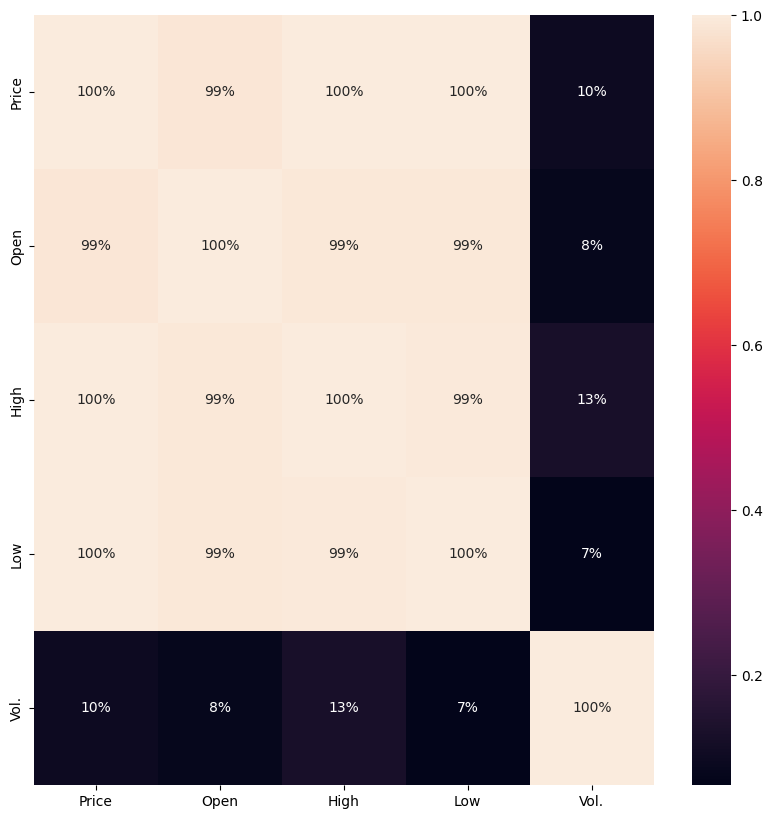

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
 

In [30]:
#saved cleaned data in Dataset folder as GP.csv
df.to_csv('Dataset/GP.csv')

# Implementation of Mathematical Models for Stock Price Prediction and Analysis

In [1]:
# load proceed data
df = pd.read_csv('Dataset/GP.csv')

In [2]:
# Print all features of dataset 
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.',
       'Change %'],
      dtype='object')


In [8]:
# Drop Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
price_mean = df['Price'].mean()
price_std = df['Price'].std()

# Print the results
print('Price mean:', price_mean)
print('Price standard deviation:', price_std)


Price mean: 325.29697916666663
Price standard deviation: 40.53992279453996


In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)


             Price      Open      High       Low      Vol.  Change %
Price     1.000000  0.987562  0.997273  0.997267  0.096987  0.054039
Open      0.987562  1.000000  0.989577  0.990015  0.080072 -0.044012
High      0.997273  0.989577  1.000000  0.993994  0.125487  0.018278
Low       0.997267  0.990015  0.993994  1.000000  0.066860  0.011681
Vol.      0.096987  0.080072  0.125487  0.066860  1.000000  0.026305
Change %  0.054039 -0.044012  0.018278  0.011681  0.026305  1.000000


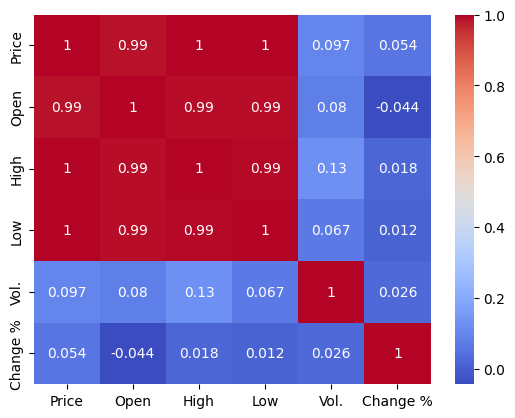

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()


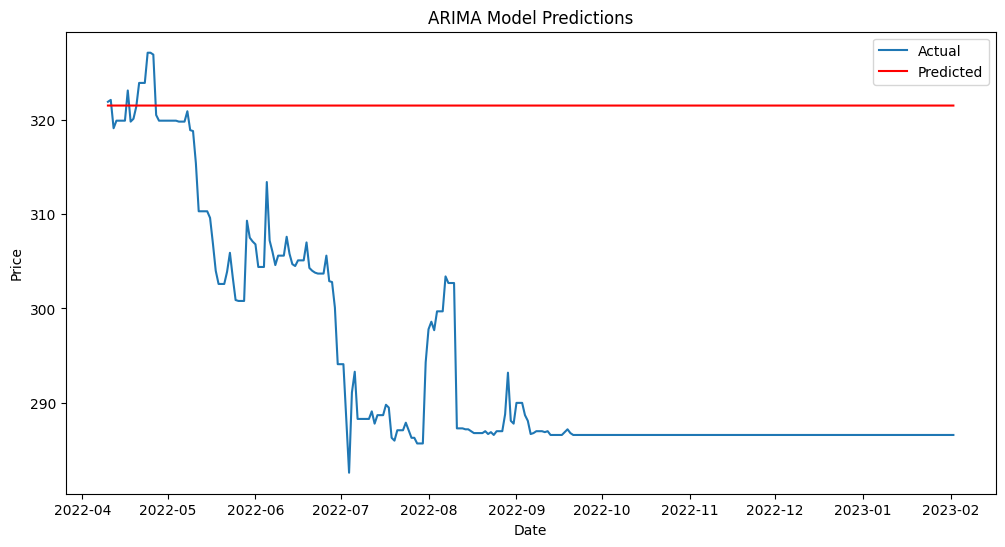

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('Dataset/GP.csv')

# Preprocess the data
df = df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'],
             axis=1)  # Drop unnecessary columns
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Set date column as index
# Resample the data to daily and forward fill missing values
df = df['Price'].resample('D').mean().fillna(method='ffill')

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# Create the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(
    start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Plot the predictions and actual values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test, label='Actual')
ax.plot(predictions, color='red', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('ARIMA Model Predictions')
ax.legend()
plt.show()


In [ ]:
# ARIMA Model saved in Model folder as GP.sav
import pickle
pickle.dump(model_fit, open('GP.sav', 'wb'))
 

In [ ]:
# load the model from disk
loaded_model = pickle.load(open('GP.sav', 'rb'))

In [ ]:
# Accuracy metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate accuracy metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Print accuracy metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 27.55
Mean Squared Error: 886.40
Root Mean Squared Error: 29.77


In [ ]:
# Name of All features
df.columns
 

Index(['Unnamed: 0', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.',
       'Change %'],
      dtype='object')

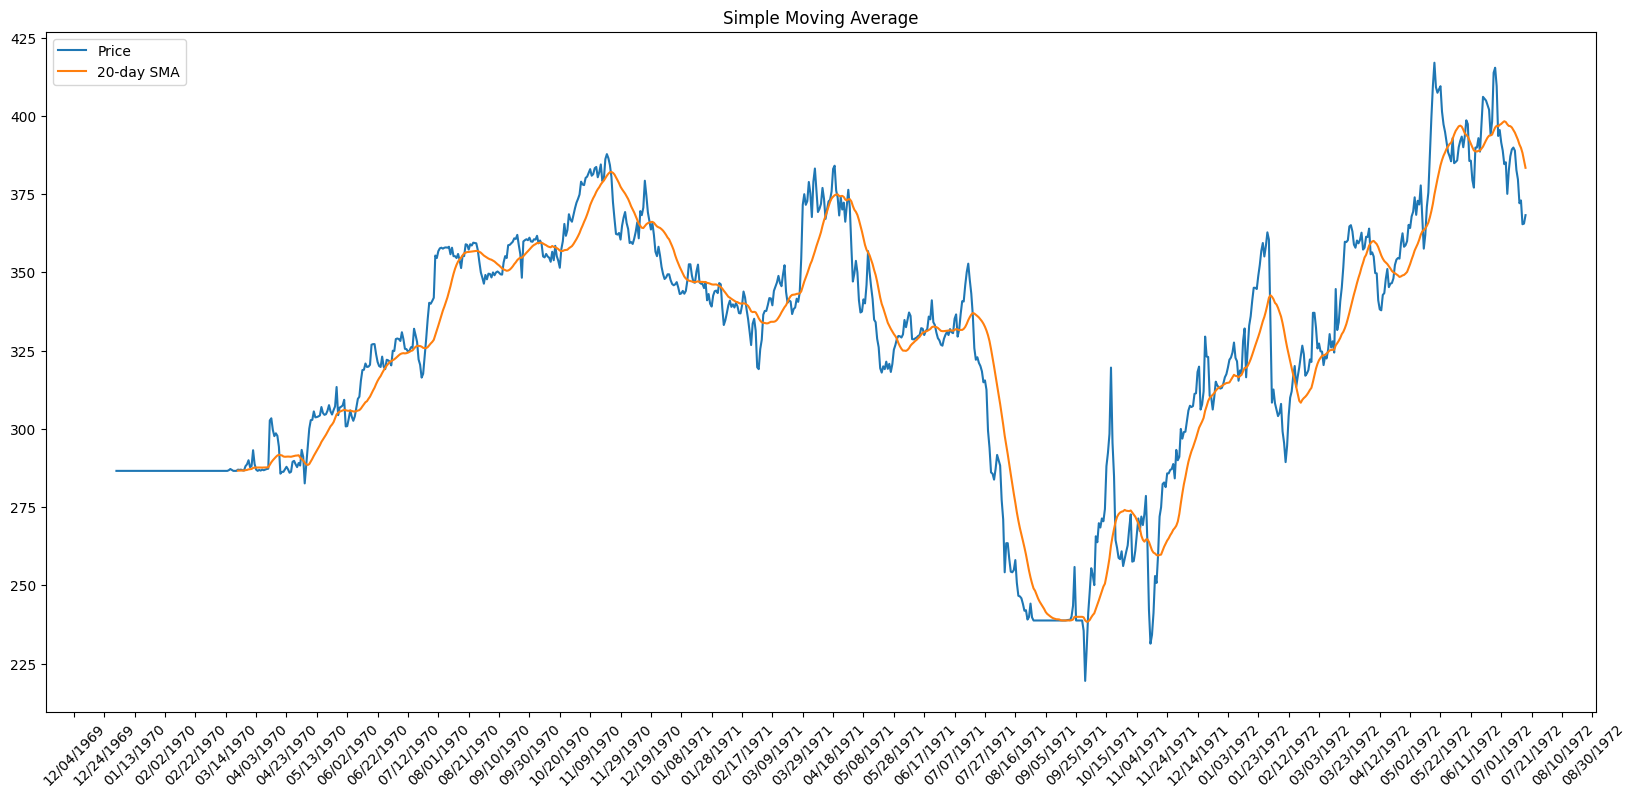

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# slice the DataFrame to select data after 120 days
df_subset = df.iloc[20:]

# slice the SMA Series to select corresponding data
sma_subset = sma_20.iloc[100:]

# set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# plot the 'Price' column
plt.plot(df_subset['Price'])

# plot the SMA values
plt.plot(sma_subset)

# add legend and title
plt.legend(['Price', '20-day SMA'])
plt.title('Simple Moving Average')

# set the x-axis interval to 20 days and format the date labels
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))

# rotate the x-axis labels and increase spacing
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)

# display the plot
plt.show()


## Moving Average

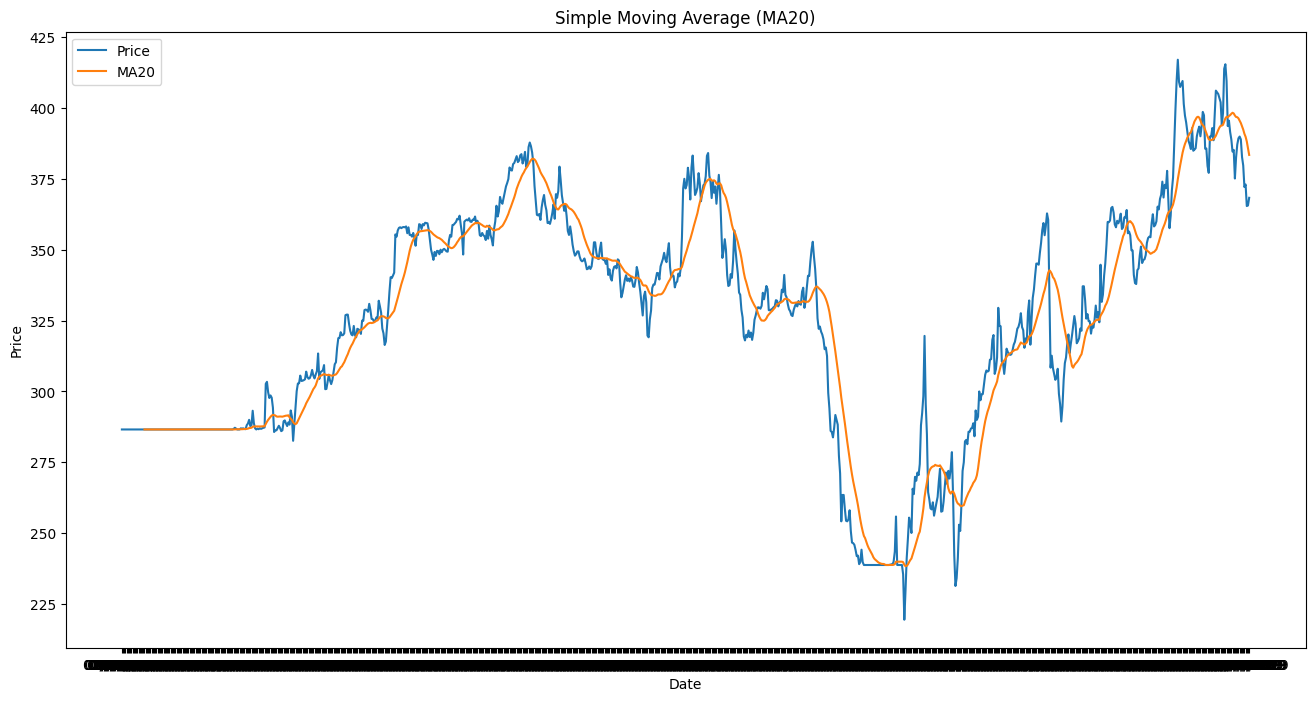

In [ ]:
# Calculate the 20-day simple moving average (MA20) for the 'Price' column
df['MA20'] = df['Price'].rolling(window=20).mean()

# Plot the 'Price' and 'MA20' columns using matplotlib
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(df['Date'], df['Price'], label='Price')
ax.plot(df['Date'], df['MA20'], label='MA20')
ax.set_title('Simple Moving Average (MA20)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()


## Simple Moving Average

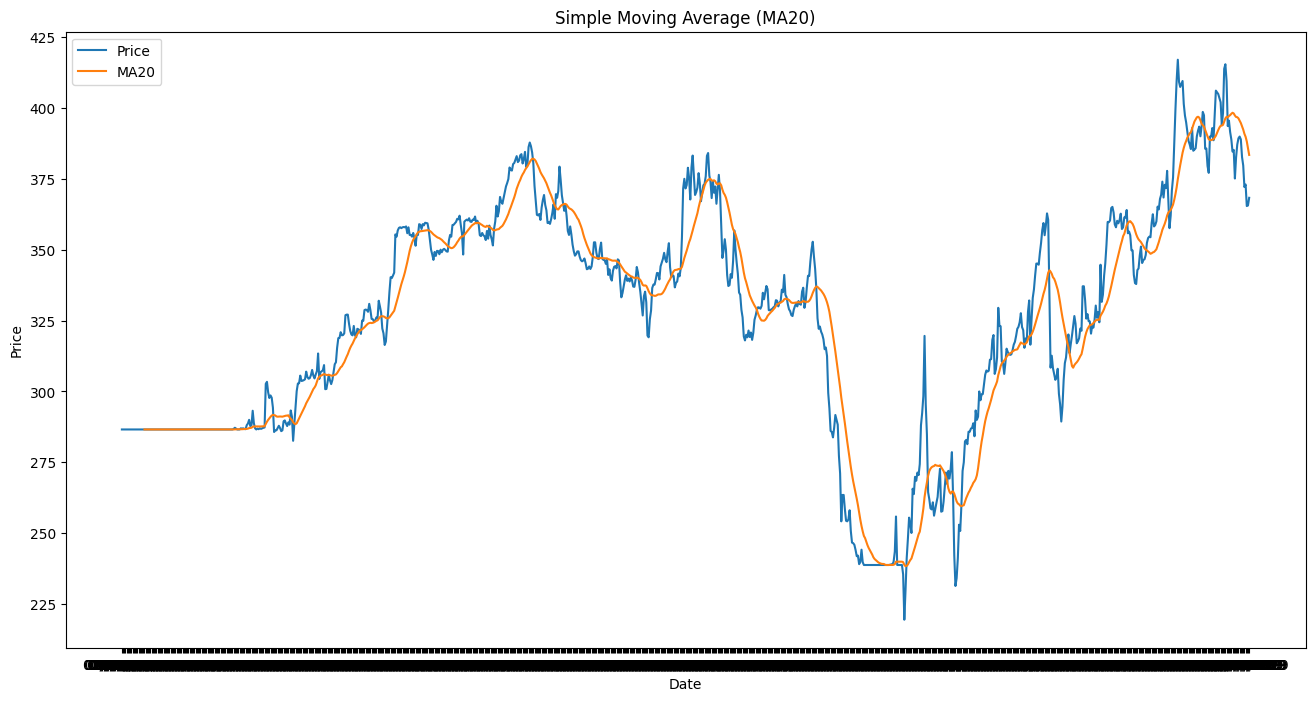

In [ ]:
df['MA20'] = df['Price'].rolling(window=20).mean()

# Plot the 'Price' and 'MA20' columns using matplotlib
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(df['Date'], df['Price'], label='Price')
ax.plot(df['Date'], df['MA20'], label='MA20')
ax.set_title('Simple Moving Average (MA20)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()


## Bollinger Bands

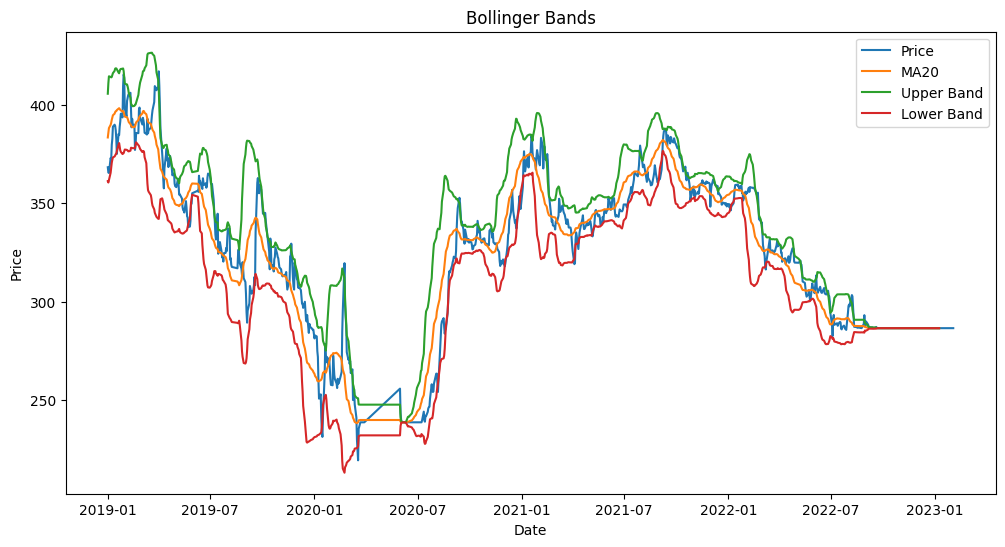

In [ ]:
# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the 20-day moving average
df['MA20'] = df['Price'].rolling(window=20).mean()

# Calculate the standard deviation of the price over the last 20 days
df['stddev'] = df['Price'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
df['UpperBand'] = df['MA20'] + 2 * df['stddev']
df['LowerBand'] = df['MA20'] - 2 * df['stddev']

# Plot the Bollinger Bands and the stock price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['UpperBand'], label='Upper Band')
plt.plot(df['Date'], df['LowerBand'], label='Lower Band')
plt.legend()
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


## RSI (Relative Strength Index)

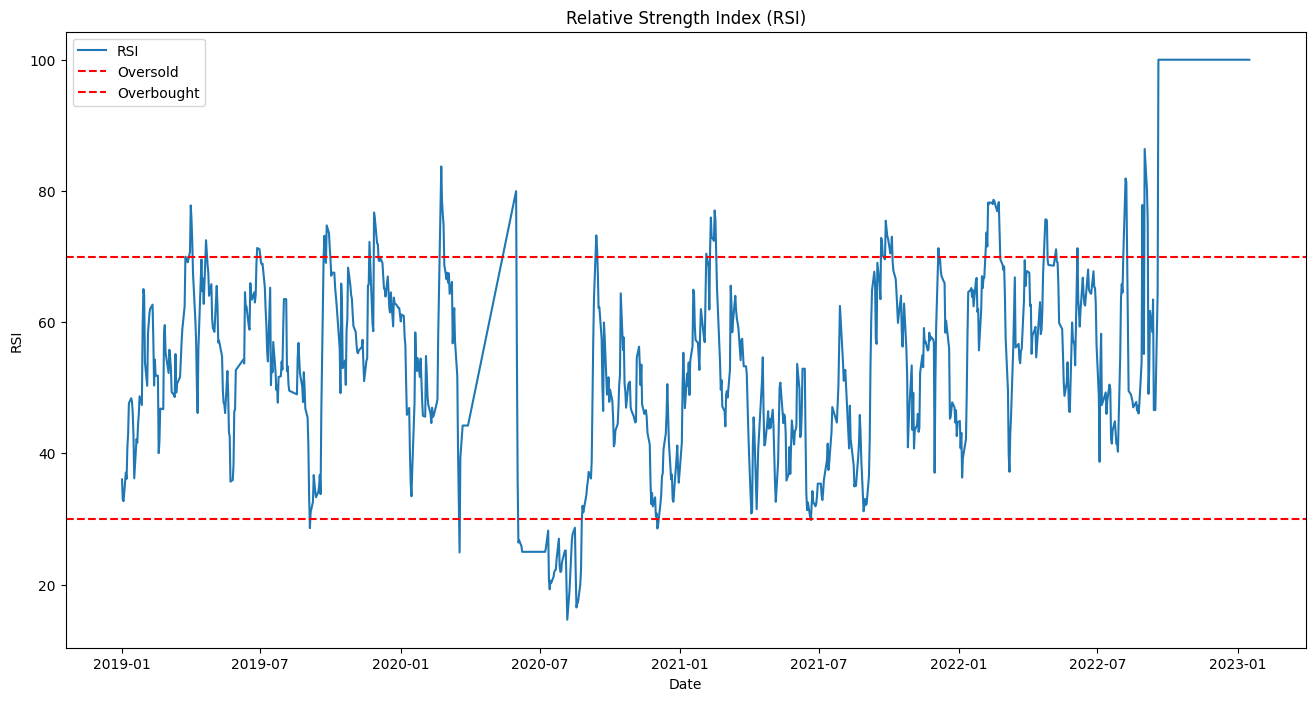

In [ ]:
import pandas as pd
import ta
import matplotlib.pyplot as plt

# Calculate RSI using TA library
df['rsi'] = ta.momentum.RSIIndicator(close=df['Price'], window=14).rsi()

# Plot RSI using matplotlib
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df['Date'], df['rsi'], label='RSI')
ax.axhline(y=30, color='r', linestyle='--', label='Oversold')
ax.axhline(y=70, color='r', linestyle='--', label='Overbought')
ax.set_title('Relative Strength Index (RSI)')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()
plt.show()


In [ ]:

# Calculate the daily returns
daily_returns = df['Price'].pct_change()

# Calculate the annualized mean return
mu = np.mean(daily_returns) * 252

# Calculate the annualized volatility
sigma = np.std(daily_returns) * np.sqrt(252)

# Set the initial parameters
S = df['Price'].iloc[-1]   # initial stock price
T = 1.0  # time period in years

# Calculate the GBM value
N = 252  # number of trading days in a year
dt = T / N
t = np.linspace(0, T, N+1)
W = np.random.standard_normal(size=N+1)
W = np.cumsum(W)*np.sqrt(dt)
X = (mu - 0.5 * sigma**2) * t + sigma * W
S = S * np.exp(X)

# Print the results
print('Annualized mean return: ', round(mu, 4))
print('Annualized volatility: ', round(sigma, 4))
print('GBM value: ', round(S[-1], 4))


Annualized mean return:  0.0944
Annualized volatility:  0.2348
GBM value:  549.4122


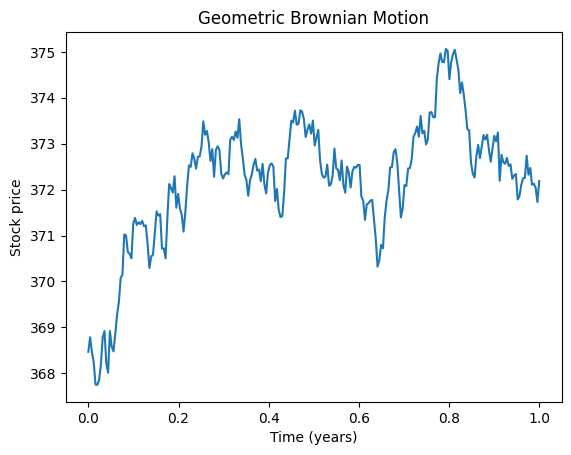

In [ ]:
# Define the parameters for GBM
S = df['Price'].iloc[-1]  # initial stock price
T = 1.0  # time horizon (1 year)
mu = np.mean(np.log(df['Price'] / df['Price'].shift(1)))  # mean return
sigma = np.std(np.log(df['Price'] / df['Price'].shift(1)))  # return volatility

# Define the time series and generate GBM
dt = 1 / 252  # time step (daily)
N = int(T / dt)  # number of time steps
t = np.linspace(0, T, N)
W = np.random.standard_normal(size=N)
W = np.cumsum(W) * np.sqrt(dt)  # standard Brownian motion
X = (mu - 0.5 * sigma**2) * t + sigma * W
S_t = S * np.exp(X)  # stock price GBM

# Plot the GBM
plt.plot(t, S_t)
plt.xlabel('Time (years)')
plt.ylabel('Stock price')
plt.title('Geometric Brownian Motion')
plt.show()
